# Plotting Tools

In [17]:
import os
import csv

import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt

### Basic plotting example

2020-06-28--15:27:02


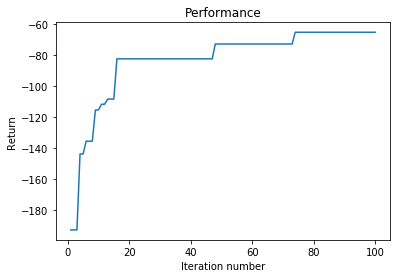

In [18]:
log_dir = None          # Directory specified in script, not including date+time
min_num_trials = None   # Plots up to this many trials

# log_dir = '/home/sasha/devel/handful-of-trials-pytorch/log/cartpole/'
# log_dir = '/home/sasha/devel/handful-of-trials-pytorch/log/halfcheetah/'
log_dir = '/home/sasha/devel/handful-of-trials-pytorch/log/pusher'
min_num_trials = 100


returns = []
for subdir in os.listdir(log_dir):
    print(subdir)
    data = loadmat(os.path.join(log_dir, subdir, "logs.mat"))
    if data["returns"].shape[1] >= min_num_trials:
        returns.append(data["returns"][0][:min_num_trials])
        
returns = np.array(returns)
returns = np.maximum.accumulate(returns, axis=-1)
mean = np.mean(returns, axis=0)

# Plot result
plt.figure()
plt.plot(np.arange(1, min_num_trials + 1), mean)
plt.title("Performance")
plt.xlabel("Iteration number")
plt.ylabel("Return")
plt.show()